Перед началом выполнения, сделайте копию этого colab'а. Чтобы сделать копию нужно в пункте меню Файл выбрать "Сохранить копию на диске"

> Блок с отступами



# Задание 1

---

Напишите функцию linan(), которая будет решать систему линейных уравнений вида:

\begin{matrix} a_{11}x+a_{12}y=b_{1}&(1) \\ a_{21}x+a_{22}y=b_{2} &(2) \end{matrix}
​
На вход программа должна принимать 2 строки.

Каждая строка содержит 3 действительных числа через пробел: коэффициенты a и b.

На выходе программа должна выдавать значения x и y в одну строку через пробел.


Примечание 1. Для разделения строки на отдельные элементы используйте функцию split()

Примечание 2. В качестве разделителя между целой и дробной частью используйте точку, например 0.2

In [ ]:
def linan(str1, str2):
    a11, a12, b1 = map(float, str1.split(' '))
    a21, a22, b2 = map(float, str2.split(' '))
    mainDeterminant = a11 * a22 - a21 * a12

    if mainDeterminant == 0:
        return "The system has infinitely many solutions or has no solutions"
    determinantX = (b1 * a22) - (b2 * a12)
    determinantY = (a11 * b2) - (a21 * b1)

    x = determinantX / mainDeterminant
    y = determinantY / mainDeterminant
    return (x, y)

str1 = input()
str2 = input()

x, y = linan(str1, str2)

print(f"{x} {y}")


5 -1.5 4.2
10 2 -1.2
0.264 -1.92


# Задание 2

Напишите функцию `decorate_matrix`, которая получает на вход одно целое число больше единицы. Функция должна возвращать матрицу n на n, у которой на границах стоят единицы, а на всех остальных позициях(если остались позиции не на границах) стоят нули.

Нужно сделать без использования  циклов.

```
# ожидаемый результат для аргумента 5
array([[1., 1., 1., 1., 1.],
[1., 0., 0., 0., 1.],
[1., 0., 0., 0., 1.],
[1., 0., 0., 0., 1.],
[1., 1., 1., 1., 1.]])
```



Обратите внимание, что ожидается массив numpy

In [ ]:
import numpy as np

def decorate_matrix(n):
    matrix = np.zeros((n, n))

    matrix[0, :] = 1
    matrix[n-1, :] = 1
    matrix[:, 0] = 1
    matrix[:, n-1] = 1

    return matrix

n = 5
matrix = decorate_matrix(n)
print(matrix)

[[1. 1. 1. 1. 1.]
 [1. 0. 0. 0. 1.]
 [1. 0. 0. 0. 1.]
 [1. 0. 0. 0. 1.]
 [1. 1. 1. 1. 1.]]


# Задание 3

1) реализуйте 2 функции:

$f(x) = (x+a)^2 - b$

$g(x) = |f(x)|$

2) Найдите аргументы, при которых достигается минимум функций $f(x)$ и $g(x)$

Пример.
Входные значение: $a=3$ и $b=4$

Выходные значения:

`-3.0 -1.0`

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def f(x, a, b):
    return (np.square(x + a) - b)

def grad_f(x, a, b, h=1e-6):
    return (f(x + h, a, b) - f(x - h, a, b)) / (2 * h)

def g(x, a, b):
    return np.abs(f(x, a, b))

def grad_g(x, a, b, h=1e-6):
    return (g(x + h, a, b) - g(x - h, a, b)) / (2 * h)

def gradient_descent_constant_step_size(f, grad_f, a, b, x0, learning_rate, max_iterations=1000, tol=1e-12):
    x = x0
    trajectory = x
    fx = f(x, a, b)

    for i in range(max_iterations):
        grad_x = grad_f(x, a, b)
        x_new = x - learning_rate * grad_x
        trajectory = x_new
        fx_new = f(x_new, a, b)
        if np.abs(fx_new - fx) < tol:
            break
        x, fx = x_new, fx_new
    return trajectory

a = 3
b = 4

initial_points = np.arange(-a * 4, a * 4, 10)

xmins_f = []
xmins_g = []

for x0 in initial_points:
    x1 = round(gradient_descent_constant_step_size(f, grad_f, a, b, x0, 0.01), 1)
    x2 = round(gradient_descent_constant_step_size(g, grad_g, a, b, x0, 0.01), 1)

    if x1 not in xmins_f:
        xmins_f.append(x1)
    if x2 not in xmins_g:
        xmins_g.append(x2)

print(f"f: {xmins_f}")
print(f"g: {xmins_g}")

f: [-3.0]
g: [-5.0, -1.0]


# Задание 4

Постройте графики для функций из предыдущего задания и отметьте другим цветом на графиках точки найденных минимумов.

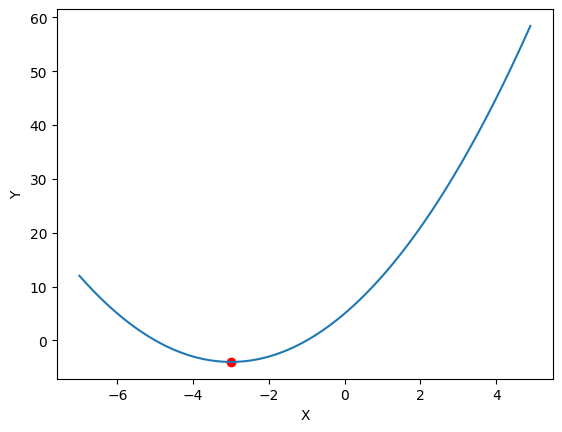

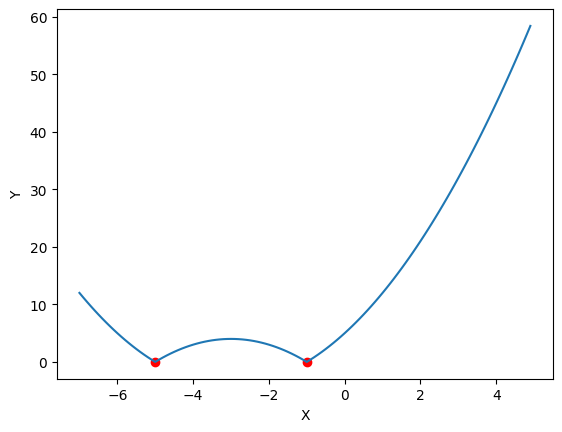

f: [-3.0]
g: [-5.0, -1.0]


In [3]:
import numpy as np
import matplotlib.pyplot as plt

def f(x, a, b):
    return (np.square(x + a) - b)

def grad_f(x, a, b, h=1e-6):
    return (f(x + h, a, b) - f(x - h, a, b)) / (2 * h)

def g(x, a, b):
    return np.abs(f(x, a, b))

def grad_g(x, a, b, h=1e-6):
    return (g(x + h, a, b) - g(x - h, a, b)) / (2 * h)

def gradient_descent_constant_step_size(f, grad_f, a, b, x0, learning_rate, max_iterations=1000, tol=1e-12):
    x = x0
    trajectory = x
    fx = f(x, a, b)

    for i in range(max_iterations):
        grad_x = grad_f(x, a, b)
        x_new = x - learning_rate * grad_x
        trajectory = x_new
        fx_new = f(x_new, a, b)
        if np.abs(fx_new - fx) < tol:
            break
        x, fx = x_new, fx_new
    return trajectory

def plot_function(f, a, b, xmins):
    x = np.arange(-7, 5, 0.1)
    y = list(map(lambda x: f(x, a, b), x))

    plt.plot(x, y)
    plt.ylabel("Y")
    plt.xlabel("X")
    for xmin in xmins:
        plt.scatter(xmin, f(xmin, a, b), color='red', marker="o")
    plt.show()

a = 3
b = 4

initial_points = np.arange(-a * 4, a * 4, 10)

xmins_f = []
xmins_g = []

for x0 in initial_points:
    x1 = round(gradient_descent_constant_step_size(f, grad_f, a, b, x0, 0.01), 1)
    x2 = round(gradient_descent_constant_step_size(g, grad_g, a, b, x0, 0.01), 1)

    if x1 not in xmins_f:
        xmins_f.append(x1)
    if x2 not in xmins_g:
        xmins_g.append(x2)


plot_function(f, a, b, xmins_f)
plot_function(g, a, b, xmins_g)

print(f"f: {xmins_f}")
print(f"g: {xmins_g}")

# Задание 5

1000 человек бросают монетку. Каждый бросил 10 раз подряд.

 1. Какова вероятность того, что хотя бы у одного человека монетка выпала 10 раз подряд той же самой стороной (орлом или решкой)?
 2. Какова вероятность того, что хотя бы у одного человека монетка выпала 8 раз подряд той же самой стороной (орлом или решкой)?
 3. Какова вероятность того, что ровно у троих человек из 1000 монетка выпала 10 раз подряд той же самой стороной (орлом или решкой)?

In [ ]:
import random
import numpy as np

def exist_people_with_successively_coin_drops(number_of_people, throws_per_person):
    count_with_successively_drops = 0
    for i in range(number_of_people):
        coin_drops = np.random.randint(0, 2, throws_per_person)
        if np.all(coin_drops == 0) or np.all(coin_drops == 1):
               count_with_successively_drops += 1
    return count_with_successively_drops >= 1

def probability_of_successively_coin_drops(iterations, number_of_people, throws_per_person):
    count_with_successively_drops = 0
    for i in range(iterations):
        if exist_people_with_successively_coin_drops(number_of_people, throws_per_person):
            count_with_successively_drops += 1
    return count_with_successively_drops/iterations



def exist_eight_successively_coin_drops(coin_drops):
    for i in range(len(coin_drops) - 7):
        if np.all(coin_drops[i:i + 8] == 1) or np.all(coin_drops[i:i + 8] == 0):
            return True
    return False

def exist_people_with_eight_successively_drops(number_of_people, throws_per_person):
    count_with_successively_drops = 0
    for i in range(number_of_people):
        coin_drops = np.random.randint(0, 2, throws_per_person)
        if exist_eight_successively_coin_drops(coin_drops):
            count_with_successively_drops += 1

    return count_with_successively_drops >= 1

def probability_of_eight_successively_coin_drops(iterations, number_of_people, throws_per_person):
    count_with_successively_drops = 0
    for i in range(iterations):
        if exist_people_with_eight_successively_drops(number_of_people, throws_per_person):
            count_with_successively_drops += 1

    return count_with_successively_drops / iterations



def exist_three_people_with_successively_coin_drops(number_of_people, throws_per_person):
    count_with_successively_drops = 0
    for i in range(number_of_people):
        coin_drops = np.random.randint(0, 2, throws_per_person)
        if np.all(coin_drops == 0) or np.all(coin_drops == 1):
            count_with_successively_drops += 1

    return count_with_successively_drops == 3

def probability_of_three_people_successively_coin_drops(iterations, number_of_people, throws_per_person):
    count_with_successively_drops = 0
    for i in range(iterations):
        if exist_three_people_with_successively_coin_drops(number_of_people, throws_per_person):
            count_with_successively_drops += 1

    return count_with_successively_drops / iterations


number_of_people = 1000
throws_per_person = 10
iterations = 4000

print(probability_of_successively_coin_drops(iterations, number_of_people, throws_per_person))
print(probability_of_eight_successively_coin_drops(iterations, number_of_people, throws_per_person))
print(probability_of_three_people_successively_coin_drops(iterations, number_of_people, throws_per_person))


0.85225
1.0
0.16625
